## 3rd Data Cleaning
Seperate title from Name to find an Age

Seperate family size to determine if child

Possibly change age ranges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("titanictrain.csv")
test=pd.read_csv("titanictest.csv")

In [3]:
train[:6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
# dropping data that does not contribute
train.drop(['Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
test.drop(['Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [5]:
# Seperating the titles from the train dataset
data=[train]
titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
train=train.drop(['Name'],axis=1)

In [6]:
data=[test]
titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
test=test.drop(['Name'],axis=1)

In [7]:
# Checking for null titles
titleNull=train[train['Title']==0]
len(titleNull)

0

Finding the mean age of possible children and/or adults
1. spouse/sib < 1 would mean siblings
2. 0 < parents/children <= 2 would probably mean parents if the first was satisfied

In [8]:
# train_pc is possible child
train_pc=train[train['Parch']<=2]

# no parent(s) when # is in front 
train_pc=train_pc[train_pc['Parch']>0]

# assuming spouse with no child
# can indicate the individual has only one sibling
train_pc=train_pc[train_pc['SibSp']>1] 

In [9]:
# test_pc is possible child
test_pc=test[test['Parch']<=2]

# no parent(s) when # is in front 
test_pc=test_pc[test_pc['Parch']>0]

# assuming spouse with no child
# can indicate the individual has only one sibling
test_pc=test_pc[test_pc['SibSp']>1] 

In [10]:
len(train_pc)

55

In [11]:
# removing duplicates
# train_pp is possible parents
train_pp=pd.concat([train,train_pc,train_pc]).drop_duplicates(keep=False)
len(train_pp)

836

In [12]:
# removing duplicates
# tet_pp is possible parents
test_pp=pd.concat([test,test_pc,test_pc]).drop_duplicates(keep=False)
len(test_pp)

404

In [13]:
# Those with title "Master" are males younger than 12 years old, according to wikipedia
# Will seperate "Master" title
train_mas=train_pp[train_pp['Title']==4]
test_mas=test_pp[test_pp['Title']==4]

In [14]:
# "Miss" that is younger with a child, assuming is not married
# Will assum it is a parent
# Finding the mean = 12.88 and median= 11.5
miss=train_pp[train_pp['Title']==2]
ymiss=miss[miss['Parch']>0]
print(ymiss['Age'].mean(),ymiss['Age'].median())

12.882352941176471 11.5


In [15]:
# Finding the mean = 10.32 and median= 8.5
miss=test_pp[test_pp['Title']==2]
xmiss=miss[miss['Parch']>0]
print(xmiss['Age'].mean(),xmiss['Age'].median())

10.318125 8.5


In [16]:
# Merging all 3
# train_lc is likely child
train_lc=pd.concat([train_pc,train_mas,ymiss]).drop_duplicates(keep='first')

# test_lc is likely child
test_lc=pd.concat([test_pc,test_mas,xmiss]).drop_duplicates(keep='first')

In [17]:
len(train_lc)

113

In [18]:
# mean_age_lc is mean age of likely a child = 9.56
# median_age_lc is median age of likely a child = 7.0
mean_age_lc=train_lc["Age"].mean()
median_age_lc=train_lc["Age"].median()
print(mean_age_lc,median_age_lc)

9.558453608247424 7.0


In [19]:
# mean_age_lct is mean age of likely a child = 11.15
# median_age_lct is median age of likely a child = 9.5
mean_age_lct=test_lc["Age"].mean()
median_age_lct=test_lc["Age"].median()
print(mean_age_lct,median_age_lct)

11.15 9.5


In [20]:
# amount of null in likely child
for i in range(8):
    tnull=train_lc[train_pp.columns[i]].isnull().sum()
    if tnull>0:
        print(train_lc.columns[i],"null total:",tnull)

Age null total: 16


In [21]:
# train_la is likely an adult
train_la=pd.concat([train,train_lc,train_lc]).drop_duplicates(keep=False)
len(train_la)

778

In [22]:
# test_la is likely an adult
test_la=pd.concat([test,test_lc,test_lc]).drop_duplicates(keep=False)

In [23]:
# mean_age_la is mean age of likely an adult = 32.87
# median_age_la is median age of likely an adult = 30
mean_age_la=train_la["Age"].mean()
median_age_la=train_la["Age"].median()
print(mean_age_la,median_age_la)

32.86547811993517 30.0


In [24]:
# amount of null in likely adult
for i in range(8):
    tnull=train_la[train_la.columns[i]].isnull().sum()
    if tnull>0:
        print(train_la.columns[i],"null total:",tnull)

Age null total: 161


In [25]:
# Replace ages of likely a child and likely an adult with mean
train_lc=train_lc.fillna(9.56)
train_la=train_la.fillna(32.87)

test_lc=test_lc.fillna(11.15)
test_la=test_la.fillna(9.5)

In [26]:
# Combining likely child and likely an adult
# train_combine is combination
train_combine=pd.concat([train_lc,train_la])

# Sorting by PassengerId
train_combine=train_combine.sort_values(by=['PassengerId'])

# test_combine is combination
test_combine=pd.concat([test_lc,test_la])

# Sorting by PassengerId
test_combine=test_combine.sort_values(by=['PassengerId'])

Text(0, 0.5, 'Survival Rate')

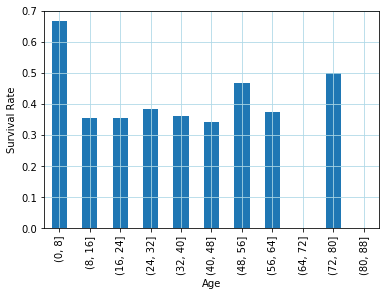

In [27]:
# Survival rate per age of combined
group_by_age = pd.cut(train_combine["Age"], np.arange(0, 90, 8))
age_grouping = train_combine.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()
plt.grid(c="lightblue")
plt.ylabel('Survival Rate')

In [28]:
grouptest=train_combine[train_combine['Age']<=64]
grouptest=grouptest[grouptest['Age']>32]
grouptest['Survived'].mean()

0.3708133971291866

In [29]:
train_combine=pd.get_dummies(train_combine,columns=['Sex'])
train_combine.drop(['Sex_male','SibSp', 'Parch'],axis=1,inplace=True)

In [30]:
#train_combine=pd.get_dummies(train_combine,columns=['Age'])

In [31]:
test_combine=pd.get_dummies(test_combine,columns=['Sex'])
test_combine.drop(['Sex_male','SibSp', 'Parch'],axis=1,inplace=True)

In [32]:
#train_combine

In [33]:
# 0: under 8 years old
# 1: 8.5-24 years old
# 2: 24.5-40 years old 
# 3: 40.5-64 years old
# 4: greater than 64.5 years old

train_combine['Age']=np.where(train_combine['Age'].between(0,8),0,train_combine['Age'])
train_combine['Age']=np.where(train_combine['Age'].between(8.5,24),1,train_combine['Age'])
train_combine['Age']=np.where(train_combine['Age'].between(24.5,40),2,train_combine['Age'])
train_combine['Age']=np.where(train_combine['Age'].between(40.5,64),3,train_combine['Age']) 
train_combine['Age']=np.where(train_combine['Age'].between(64.5,100),4,train_combine['Age'])

In [34]:
test_combine['Age']=np.where(test_combine['Age'].between(0,8),0,test_combine['Age'])
test_combine['Age']=np.where(test_combine['Age'].between(8.5,24),1,test_combine['Age'])
test_combine['Age']=np.where(test_combine['Age'].between(24.5,40),2,test_combine['Age'])
test_combine['Age']=np.where(test_combine['Age'].between(40.5,64),3,test_combine['Age']) 
test_combine['Age']=np.where(test_combine['Age'].between(64.5,100),4,test_combine['Age'])

In [35]:
train_combine[:5]

,PassengerId,Survived,Pclass,Age,Title,Sex_female
0,1,0,3,1.0,1,0
1,2,1,1,2.0,3,1
2,3,1,3,2.0,2,1
3,4,1,1,2.0,3,1
4,5,0,3,2.0,1,0


In [36]:
test_combine[:5]

,PassengerId,Pclass,Age,Title,Sex_female
0,892,3,2.0,1,0
1,893,3,3.0,3,1
2,894,2,3.0,1,0
3,895,3,2.0,1,0
4,896,3,1.0,3,1


In [37]:
#train_combine=pd.get_dummies(train_combine,columns=['Sex_female'])
train_combine=pd.get_dummies(train_combine,columns=['Age'])
train_combine=pd.get_dummies(train_combine,columns=['Pclass'])

#test_combine=pd.get_dummies(test_combine,columns=['Sex_female'])
test_combine=pd.get_dummies(test_combine,columns=['Age'])
test_combine=pd.get_dummies(test_combine,columns=['Pclass'])

In [38]:
train_combine[:6]

,PassengerId,Survived,Title,Sex_female,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,0,0,1,0,0,0,0,0,1
1,2,1,3,1,0,0,1,0,0,1,0,0
2,3,1,2,1,0,0,1,0,0,0,0,1
3,4,1,3,1,0,0,1,0,0,1,0,0
4,5,0,1,0,0,0,1,0,0,0,0,1
5,6,0,1,0,0,0,1,0,0,0,0,1


In [39]:
test_combine[:6]

,PassengerId,Title,Sex_female,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Pclass_1,Pclass_2,Pclass_3
0,892,1,0,0,0,1,0,0,0,0,1
1,893,3,1,0,0,0,1,0,0,0,1
2,894,1,0,0,0,0,1,0,0,1,0
3,895,1,0,0,0,1,0,0,0,0,1
4,896,3,1,0,1,0,0,0,0,0,1
5,897,1,0,0,1,0,0,0,0,0,1


In [40]:
# Drop Title
#train_combine.drop(['Title'],axis=1).values

In [41]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
nsplit=100
depth=3
errs=[]

In [43]:
X = train_combine.drop(['Survived','PassengerId'], axis=1).values
Y = train_combine['Survived'].values
XTRAIN  = test.drop(['PassengerId'], axis=1)

In [44]:
while (depth < 7):
    errs=[]
    for j in range(nsplit):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        DT=tree.DecisionTreeClassifier(max_depth=depth)
        DT.fit(XTRAIN,YTRAIN)
        YP=DT.predict(XTEST)
        errs.append(1-accuracy_score(YTEST,YP))
    errs.append(np.mean(errs))
    depth = depth + 1

In [45]:
nsplit=1000
depth=4
errs=[]
for j in range(nsplit):
    XTRAIN, XTEST, YTRAIN, YTEST, =train_test_split(X,Y,test_size=0.2)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN,YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("Decision Tree Depth = %d mean error = %7.6f SD=%7.6f"\
      %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 4 mean error = 0.201279 SD=0.026823


In [46]:
# accuracy score using Decision Tree Classifier
#clf = tree.DecisionTreeClassifier(max_depth=4)
#clf.fit(XTRAIN,YTRAIN)
#clf.score(XTEST,YTEST)

In [47]:
# accuracy score using Random Forest Classifier
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (XTRAIN, YTRAIN)
clf.score (XTEST, YTEST)

0.776536312849162

In [48]:
#import graphviz
#import pydotplus
#from IPython.display import Image
#from sklearn.externals.six import StringIO 

In [49]:
#dot_data = tree.export_graphviz(DT, out_file=None, rotate=False, 
 #           feature_names=["Pclass","Sex","Age",],
  #          class_names=list(map(str,['Survived','Died'])),
# filled=True, rounded=True, special_characters=True)

In [50]:
#graph2 = pydotplus.graph_from_dot_data(dot_data)  

In [51]:
#Image(graph2.create_png())

In [52]:
# accuracy across the training dataset
acc_decision_tree = round(DT.score(XTRAIN, YTRAIN) * 100, 2)
acc_decision_tree

81.88

In [53]:
#from sklearn import ensemble

In [54]:
#clf = ensemble.RandomForestClassifier(n_estimators=100)
#XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
#clf.fit (XTRAIN, YTRAIN)
#clf.score (XTEST, YTEST)

In [55]:
submission_3 = pd.DataFrame(columns=['PassengerId','Survived'])
submission_3['PassengerId']=test_combine.PassengerId

In [56]:
test_combine[:4]

,PassengerId,Title,Sex_female,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Pclass_1,Pclass_2,Pclass_3
0,892,1,0,0,0,1,0,0,0,0,1
1,893,3,1,0,0,0,1,0,0,0,1
2,894,1,0,0,0,0,1,0,0,1,0
3,895,1,0,0,0,1,0,0,0,0,1


In [57]:
train_combine[:4]

,PassengerId,Survived,Title,Sex_female,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,0,0,1,0,0,0,0,0,1
1,2,1,3,1,0,0,1,0,0,1,0,0
2,3,1,2,1,0,0,1,0,0,0,0,1
3,4,1,3,1,0,0,1,0,0,1,0,0


In [58]:
X2 = test_combine.drop(['PassengerId'], axis=1).values
clf.fit (X,Y)
predictions = clf.predict(X2)

In [59]:
submission_3['Survived']=predictions
submission_3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
submission_3.to_csv('submission_3.csv', index=False)